### Importing the libraries

In [1]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Image Processing
import cv2 as cv
from PIL import Image
#Intracting with operating systems
import os
#Model processing
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
%matplotlib inline

#### Data Augmentation

In [41]:
datagen = ImageDataGenerator(rotation_range = 40, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, brightness_range = (0.5, 1.5))

image_directory = r'C:\\Users\\Dell\\Documents\\Projects\\ML\\Computer Vision\\Mask Detection\\images\\Masked\\'
SIZE = 150
dataset = []

my_images = os.listdir(image_directory)

for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory  + image_name)       
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
        
x = np.array(dataset)
i = 0

for batch in datagen.flow(x, batch_size=16, save_to_dir= r'C:\\Users\Dell\\Documents\\Projects\\ML\\Computer Vision\\Mask Detection\\images\\Augmented images',save_prefix='dr',save_format='jpg'):    
    i += 1    
    if i > 50:        
        break

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,shear_range = 0.2, zoom_range = 0.2, horizontal flip = True, brightness_range = (0.5,1.5))


### Extracting the Image names

In [2]:
#Extracting the filenames in the path
masked_dir = os.listdir('images\\Masked')
non_masked_dir = os.listdir('images\\Nonmasked')

#### Resizing the Images to a common dimension and converting them to array

In [3]:
#List to store the image arrays and labels
data = []
labels = []

In [4]:
#Converting all the masked images into array
for img in masked_dir:
    img_path = 'images\Masked\{}'.format(img)
    image = load_img(img_path, target_size=(150,150))
    image = img_to_array(image)

    data.append(image)
    labels.append(1)

In [5]:
#Converting all the non-masked images into array
for img in non_masked_dir:
    img_path = 'images\\Nonmasked\\{}'.format(img)
    image = load_img(img_path, target_size=(150, 150))
    image = img_to_array(image)

    data.append(image)
    labels.append(0)

In [6]:
#Converting the data and labels list into arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [51]:
#function to display an image
def show_image(filename):
    img = cv.imread('{}'.format(filename))
    cv.imshow("Photo", img)
    cv.waitKey(0)  
    cv.destroyAllWindows() 

In [52]:
#Sample Display of image
show_image('images\\Masked\\maksssksksss1.png')

### Spliting the data into train and test set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=101)

### Regularizing the data

In [9]:
#List to store the arrays after converting them from 32x32x3 to 3072 because MinMaxScaler allows only <=2 Dimensional Array
arr_train = []
arr_test = []

#converting arrays from 32x32x3 to 3072
for i in range(len(X_train)):
    arr_train.append(X_train[i].reshape(67500))

for i in range(len(X_test)):
    arr_test.append(X_test[i].reshape(67500))

In [10]:
#converting the lists to array
arr_train = np.array(arr_train,dtype='float32')
arr_test = np.array(arr_test,dtype='float32')

In [11]:
#Regularizing the data using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(arr_train)
X_test = scaler.transform(arr_test)

In [8]:
col = []
for i in range(1,4):
    for j in range(1,151):
        for k in range(1,151):
            col.append(str(i)+'x'+str(j)+'x'+str(k))

In [13]:
#Converting the 1-D arrays into DataFrame 
df_train = pd.DataFrame(X_train,columns = col)
df_test = pd.DataFrame(X_test,columns = col)
y_train = pd.DataFrame(y_train,columns = ['label'])
y_test = pd.DataFrame(y_test,columns = ['label'])

#Concatinating the DataFrames to form train and test data set which can be use for further training
df_train = pd.concat([df_train,y_train],axis=1)
df_test = pd.concat([df_test,y_test],axis=1)

In [14]:
df_train.head()

,1x1x1,1x1x2,1x1x3,1x1x4,1x1x5,1x1x6,1x1x7,1x1x8,1x1x9,1x1x10,...,3x150x142,3x150x143,3x150x144,3x150x145,3x150x146,3x150x147,3x150x148,3x150x149,3x150x150,label
0,0.615686,0.239216,0.325490,0.627451,0.231373,0.321569,0.631373,0.223529,0.313726,0.631373,...,0.678431,0.615686,0.474510,0.694118,0.623529,0.454902,0.776471,0.701961,0.525490,1
1,0.921569,0.941177,0.952941,0.921569,0.941177,0.952941,0.921569,0.941177,0.952941,0.917647,...,0.996078,0.498039,0.133333,0.996078,0.498039,0.133333,0.988235,0.501961,0.125490,1
2,0.427451,0.552941,0.745098,0.423529,0.552941,0.749020,0.419608,0.545098,0.745098,0.419608,...,0.196078,0.196078,0.164706,0.192157,0.192157,0.168627,0.180392,0.184314,0.156863,1
3,0.400000,0.400000,0.392157,0.400000,0.400000,0.392157,0.411765,0.407843,0.400000,0.411765,...,0.517647,0.513726,0.494118,0.525490,0.521569,0.501961,0.525490,0.521569,0.501961,0
4,0.082353,0.007843,0.015686,0.082353,0.007843,0.015686,0.086275,0.011765,0.019608,0.078431,...,0.141176,0.113725,0.011765,0.137255,0.109804,0.007843,0.141176,0.101961,0.003922,0


In [15]:
#savingthe DataFrames in .csv format
df_train.to_csv('train.csv',index=False)
df_test.to_csv('test.csv',index=False)

### Training the Model

In [2]:
#Extracting the one dimensional data for logistic regression which takes linear data as input
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train.drop('Unnamed: 0',axis=1)
df_test = df_test.drop('Unnamed: 0',axis=1)

In [3]:
#converting the regularized data into 150x150x3 regularized arrays
y_train = np.array(df_train['label'])
y_test = np.array(df_test['label'])

df_train = np.array(df_train.drop('label',axis=1))
df_test = np.array(df_test.drop('label',axis=1))

X_train = []
X_test = []

for i in range(len(df_train)):
    X_train.append(df_train[i].reshape(150,150,3))

for i in range(len(df_test)):
    X_test.append(df_test[i].reshape(150,150,3))
    
X_train = np.array(X_train,dtype='float32')
X_test = np.array(X_test,dtype='float32')

In [4]:
#Extracting the one dimensional data for logistic regression which takes linear data as input
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train.drop('Unnamed: 0',axis=1)
df_test = df_test.drop('Unnamed: 0',axis=1)

In [9]:
X_lr_train = df_train[col]
X_lr_test = df_test[col]
y_lr_train = df_train['label']
y_lr_test = df_test['label']

In [10]:
y_lr_train.value_counts()

1    1736
0    1560
Name: label, dtype: int64

In [11]:
y_lr_test.value_counts()

1    421
0    403
Name: label, dtype: int64

#### Logistic Regression

In [25]:
#training the logistic regression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=10000000000000000)
model_lr.fit(X_lr_train,y_lr_train)
pred = model_lr.predict(X_lr_test)

In [15]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [27]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.9167643610785463

0.9138349514563107

[[362  41]
 [ 30 391]]

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       403
           1       0.91      0.93      0.92       421

    accuracy                           0.91       824
   macro avg       0.91      0.91      0.91       824
weighted avg       0.91      0.91      0.91       824



#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model = KNeighborsClassifier()
model.fit(X_lr_train,y_lr_train)
pred = model.predict(X_lr_test)

In [30]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.8067885117493473

0.8203883495145631

[[367  36]
 [112 309]]

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       403
           1       0.90      0.73      0.81       421

    accuracy                           0.82       824
   macro avg       0.83      0.82      0.82       824
weighted avg       0.83      0.82      0.82       824



##### SVM

In [19]:
from sklearn.svm import SVC

In [25]:
model = SVC(C=10)
model.fit(X_lr_train,y_lr_train)
pred = model.predict(X_lr_test)

In [26]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.9385342789598109

0.9368932038834952

[[375  28]
 [ 24 397]]

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       403
           1       0.93      0.94      0.94       421

    accuracy                           0.94       824
   macro avg       0.94      0.94      0.94       824
weighted avg       0.94      0.94      0.94       824



##### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier()
model.fit(X_lr_train,y_lr_train)
pred = model.predict(X_lr_test)

In [29]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.8110047846889954

0.808252427184466

[[327  76]
 [ 82 339]]

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       403
           1       0.82      0.81      0.81       421

    accuracy                           0.81       824
   macro avg       0.81      0.81      0.81       824
weighted avg       0.81      0.81      0.81       824



##### Bagging Decision Tree

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model.fit(X_lr_train, y_lr_train)
pred = model.predict(X_lr_test)

In [16]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.8781065088757397

0.875

[[350  53]
 [ 50 371]]

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       403
           1       0.88      0.88      0.88       421

    accuracy                           0.88       824
   macro avg       0.88      0.87      0.87       824
weighted avg       0.88      0.88      0.87       824



##### Boosting Decision Tree

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
model.fit(X_lr_train, y_lr_train)
pred = model.predict(X_lr_test)

In [61]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.9121621621621622

0.9024390243902439

[[211  24]
 [ 28 270]]

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       235
           1       0.92      0.91      0.91       298

    accuracy                           0.90       533
   macro avg       0.90      0.90      0.90       533
weighted avg       0.90      0.90      0.90       533



##### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier()
model.fit(X_lr_train,y_lr_train)
pred = model.predict(X_lr_test)

In [21]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.9192982456140352

0.9162621359223301

[[362  41]
 [ 28 393]]

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       403
           1       0.91      0.93      0.92       421

    accuracy                           0.92       824
   macro avg       0.92      0.92      0.92       824
weighted avg       0.92      0.92      0.92       824



##### XG Boost

In [22]:
import xgboost as xgb

In [23]:
model = xgb.XGBClassifier()
model.fit(X_lr_train,y_lr_train)
pred = model.predict(X_lr_test)

In [24]:
print(f1_score(y_lr_test,pred))
print()
print(accuracy_score(y_lr_test,pred))
print()
print(confusion_matrix(y_lr_test,pred))
print()
print(classification_report(y_lr_test,pred))

0.9312796208530806

0.9296116504854369

[[373  30]
 [ 28 393]]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       403
           1       0.93      0.93      0.93       421

    accuracy                           0.93       824
   macro avg       0.93      0.93      0.93       824
weighted avg       0.93      0.93      0.93       824



In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3296, 150, 150, 3)
(824, 150, 150, 3)
(3296,)
(824,)


### A Convolutional Neural Network

#### VGG-16

In [ ]:
'''
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras import models

base_model = VGG16(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
x = tfl.Flatten()(base_model.output)
x =tfl.Dense(512, activation='relu')(x)
x = tfl.Dropout(0.5)(x)
x = tfl.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.summary()

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 9)

pred = (model.predict(X_test)>0.5).astype('int32')

print(f1_score(y_test,pred))
print()
print(accuracy_score(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

val_loss = pd.DataFrame(history.history['val_loss'])
loss = pd.DataFrame(history.history['loss'])
losses = pd.concat([loss,val_loss],axis=1)
losses.columns=['loss','val_loss']

losses[['val_loss','loss']].plot()

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

model.save('Mask_Detection.h5')
'''

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras import models
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
base_model = VGG16(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [31]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
x = tfl.Flatten()(base_model.output)
x =tfl.Dense(512, activation='relu')(x)
x = tfl.Dropout(0.5)(x)
x = tfl.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience = 3)

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [35]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [36]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 9, callbacks = earlystop)

Epoch 1/9
103/103 [==============================] - 262s 3s/step - loss: 0.2025 - accuracy: 0.9211 - val_loss: 0.1106 - val_accuracy: 0.9575
Epoch 2/9
103/103 [==============================] - 260s 3s/step - loss: 0.1063 - accuracy: 0.9596 - val_loss: 0.0706 - val_accuracy: 0.9733
Epoch 3/9
103/103 [==============================] - 266s 3s/step - loss: 0.0840 - accuracy: 0.9681 - val_loss: 0.0675 - val_accuracy: 0.9757
Epoch 4/9
103/103 [==============================] - 246s 2s/step - loss: 0.0712 - accuracy: 0.9721 - val_loss: 0.0748 - val_accuracy: 0.9660
Epoch 5/9
103/103 [==============================] - 246s 2s/step - loss: 0.0573 - accuracy: 0.9791 - val_loss: 0.0640 - val_accuracy: 0.9757
Epoch 6/9
103/103 [==============================] - 247s 2s/step - loss: 0.0534 - accuracy: 0.9821 - val_loss: 0.0619 - val_accuracy: 0.9769
Epoch 7/9
103/103 [==============================] - 245s 2s/step - loss: 0.0455 - accuracy: 0.9848 - val_loss: 0.0738 - val_accuracy: 0.9733
Epoch 

In [38]:
model.evaluate(X_test,y_test)

26/26 [==============================] - 48s 2s/step - loss: 0.0646 - accuracy: 0.9733


[0.06463838368654251, 0.9733009934425354]

Evaluating the CNN model

In [30]:
pred = (model.predict(X_test)>0.5).astype('int32')

17/17 [==============================] - 34s 2s/step


In [39]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [40]:
print(f1_score(y_test,pred))
print()
print(accuracy_score(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

0.9312796208530806

0.9296116504854369

[[373  30]
 [ 28 393]]

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       403
           1       0.93      0.93      0.93       421

    accuracy                           0.93       824
   macro avg       0.93      0.93      0.93       824
weighted avg       0.93      0.93      0.93       824



In [41]:
val_loss = pd.DataFrame(history.history['val_loss'])
loss = pd.DataFrame(history.history['loss'])
accuracy = pd.DataFrame(history.history['accuracy'])
val_accuracy = pd.DataFrame(history.history['val_accuracy'])
losses = pd.concat([loss,val_loss,accuracy,val_accuracy],axis=1)
losses.columns=['loss','val_loss','accuracy','val_accuracy']

<AxesSubplot:>

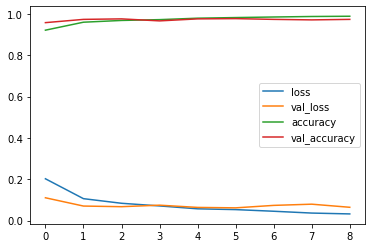

In [42]:
losses.plot()

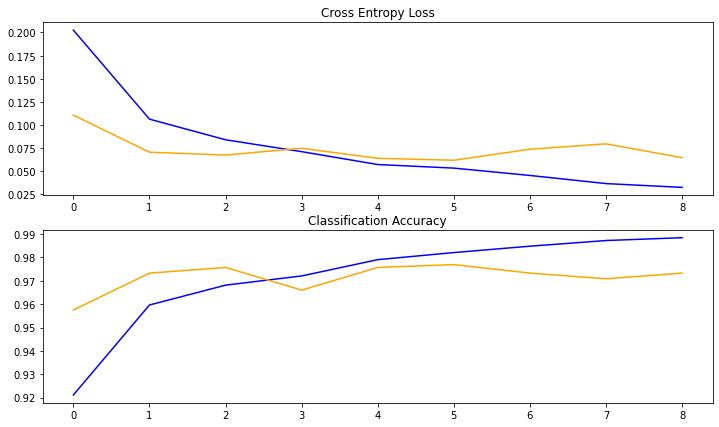

In [43]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

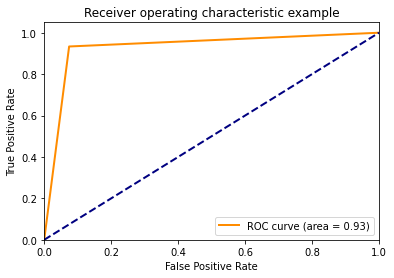

In [44]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Saving the model

In [45]:
model.save('Mask_Detection.h5')

#### VGG-19

In [47]:
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras import models
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
base_model = VGG19(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [49]:
for layer in base_model.layers:
    layer.trainable = False

In [50]:
x = tfl.Flatten()(base_model.output)
x =tfl.Dense(512, activation='relu')(x)
x = tfl.Dropout(0.5)(x)
x = tfl.Dense(1, activation='sigmoid')(x)

In [51]:
model = tf.keras.models.Model(base_model.input, x)

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [53]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [54]:
earlystop = EarlyStopping(monitor = 'val_loss',patience = 3)

In [55]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 100, callbacks = earlystop)

Epoch 1/100
103/103 [==============================] - 293s 3s/step - loss: 0.2442 - accuracy: 0.9011 - val_loss: 0.1292 - val_accuracy: 0.9527
Epoch 2/100
103/103 [==============================] - 298s 3s/step - loss: 0.1302 - accuracy: 0.9530 - val_loss: 0.1364 - val_accuracy: 0.9551
Epoch 3/100
103/103 [==============================] - 297s 3s/step - loss: 0.1030 - accuracy: 0.9612 - val_loss: 0.0781 - val_accuracy: 0.9684
Epoch 4/100
103/103 [==============================] - 294s 3s/step - loss: 0.0880 - accuracy: 0.9694 - val_loss: 0.0731 - val_accuracy: 0.9721
Epoch 5/100
103/103 [==============================] - 295s 3s/step - loss: 0.0744 - accuracy: 0.9721 - val_loss: 0.0746 - val_accuracy: 0.9709
Epoch 6/100
103/103 [==============================] - 294s 3s/step - loss: 0.0687 - accuracy: 0.9730 - val_loss: 0.0696 - val_accuracy: 0.9757
Epoch 7/100
103/103 [==============================] - 311s 3s/step - loss: 0.0627 - accuracy: 0.9779 - val_loss: 0.1229 - val_accuracy:

In [56]:
pred = (model.predict(X_test)>0.5).astype('int32')

26/26 [==============================] - 76s 3s/step


In [57]:
print(f1_score(y_test,pred))
print()
print(accuracy_score(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

0.9476309226932669

0.9490291262135923

[[402   1]
 [ 41 380]]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       403
           1       1.00      0.90      0.95       421

    accuracy                           0.95       824
   macro avg       0.95      0.95      0.95       824
weighted avg       0.95      0.95      0.95       824



In [58]:
val_loss = pd.DataFrame(history.history['val_loss'])
loss = pd.DataFrame(history.history['loss'])
accuracy = pd.DataFrame(history.history['accuracy'])
val_accuracy = pd.DataFrame(history.history['val_accuracy'])
losses = pd.concat([loss,val_loss,accuracy,val_accuracy],axis=1)
losses.columns=['loss','val_loss','accuracy','val_accuracy']

<AxesSubplot:>

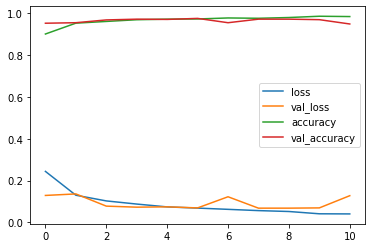

In [59]:
losses.plot()

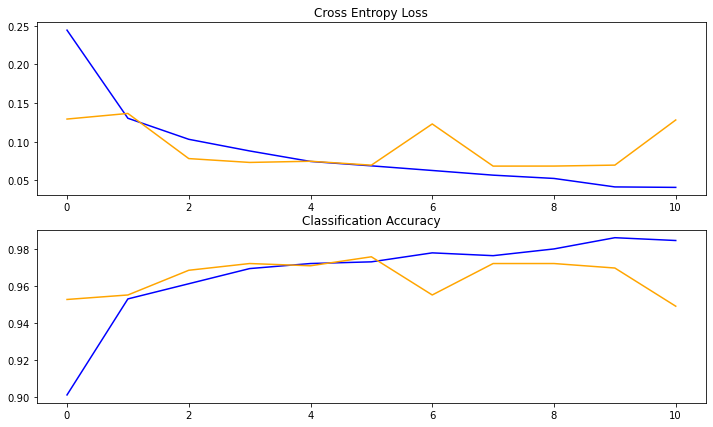

In [60]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

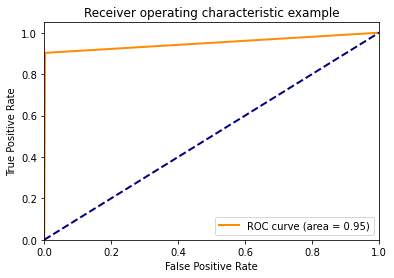

In [61]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [62]:
model.save('Mask_Detection_VGG19.h5')

In [123]:
import netron
netron.start('Mask_Detection_VGG19.h5')

Serving 'Mask_Detection_VGG19.h5' at http://localhost:8080


('localhost', 8080)

##### MobileNetV-2

In [63]:
#Extracting the filenames in the path
masked_dir = os.listdir('images\\Masked')
non_masked_dir = os.listdir('images\\Nonmasked')

#List to store the image arrays and labels
data = []
labels = []

#Converting all the masked images into array
for img in masked_dir:
    img_path = 'images\Masked\{}'.format(img)
    image = load_img(img_path, target_size=(160,160))
    image = img_to_array(image)

    data.append(image)
    labels.append(1)
    
#Converting all the non-masked images into array
for img in non_masked_dir:
    img_path = 'images\\Nonmasked\\{}'.format(img)
    image = load_img(img_path, target_size=(160, 160))
    image = img_to_array(image)

    data.append(image)
    labels.append(0)
    
#Converting the data and labels list into arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=101)

#List to store the arrays after converting them from 32x32x3 to 3072 because MinMaxScaler allows only <=2 Dimensional Array
arr_train = []
arr_test = []

#converting arrays from 160x160x3 to 76800
for i in range(len(X_train)):
    arr_train.append(X_train[i].reshape(76800))

for i in range(len(X_test)):
    arr_test.append(X_test[i].reshape(76800))
    
#converting the lists to array
arr_train = np.array(arr_train,dtype='float32')
arr_test = np.array(arr_test,dtype='float32')

#Regularizing the data using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(arr_train)
X_test = scaler.transform(arr_test)

col = []
for i in range(1,4):
    for j in range(1,161):
        for k in range(1,161):
            col.append(str(i)+'x'+str(j)+'x'+str(k))
            
#Converting the 1-D arrays into DataFrame 
df_train = pd.DataFrame(X_train,columns = col)
df_test = pd.DataFrame(X_test,columns = col)
y_train = pd.DataFrame(y_train,columns = ['label'])
y_test = pd.DataFrame(y_test,columns = ['label'])

#Concatinating the DataFrames to form train and test data set which can be use for further training
df_train = pd.concat([df_train,y_train],axis=1)
df_test = pd.concat([df_test,y_test],axis=1)

#converting the regularized data into 32x32x3 regularized arrays
y_train = np.array(df_train['label'])
y_test = np.array(df_test['label'])

df_train = np.array(df_train.drop('label',axis=1))
df_test = np.array(df_test.drop('label',axis=1))

X_train = []
X_test = []

for i in range(len(df_train)):
    X_train.append(df_train[i].reshape(160,160,3))

for i in range(len(df_test)):
    X_test.append(df_test[i].reshape(160,160,3))
    
X_train = np.array(X_train,dtype='float32')
X_test = np.array(X_test,dtype='float32')

In [64]:
np.save('X_train_160_160_3.npy',X_train)
np.save('X_test_160_160_3.npy',X_test)
np.save('y_train_160_160_3.npy',y_train)
np.save('y_test_160_160_3.npy',y_test)

In [70]:
X_train_160 = np.load('X_train_160_160_3.npy')
X_test_160 = np.load('X_test_160_160_3.npy')
y_train_160 = np.load('y_train_160_160_3.npy')
y_test_160 = np.load('y_test_160_160_3.npy')

In [71]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras import models
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
base_model = MobileNetV2(input_shape = (160, 160, 3), include_top = False, weights = 'imagenet')

In [73]:
for layer in base_model.layers:
    layer.trainable = False

In [74]:
x = tfl.Flatten()(base_model.output)
x =tfl.Dense(512, activation='relu')(x)
x = tfl.Dropout(0.5)(x)
x = tfl.Dense(1, activation='sigmoid')(x)

In [75]:
model = tf.keras.models.Model(base_model.input, x)

In [76]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']         

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [77]:
earlystop = EarlyStopping(monitor='val_loss',patience=3)

In [78]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [79]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 100,callbacks=earlystop)

Epoch 1/100
103/103 [==============================] - 71s 650ms/step - loss: 0.2750 - accuracy: 0.9402 - val_loss: 0.5105 - val_accuracy: 0.8641
Epoch 2/100
103/103 [==============================] - 65s 632ms/step - loss: 0.0944 - accuracy: 0.9782 - val_loss: 0.1948 - val_accuracy: 0.9684
Epoch 3/100
103/103 [==============================] - 64s 625ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.0921 - val_accuracy: 0.9842
Epoch 4/100
103/103 [==============================] - 64s 626ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.1670 - val_accuracy: 0.9612
Epoch 5/100
103/103 [==============================] - 63s 616ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0953 - val_accuracy: 0.9818
Epoch 6/100
103/103 [==============================] - 64s 619ms/step - loss: 0.0266 - accuracy: 0.9942 - val_loss: 0.1203 - val_accuracy: 0.9745


In [80]:
pred = (model.predict(X_test)>0.5).astype('int32')

26/26 [==============================] - 11s 385ms/step


In [81]:
print(f1_score(y_test,pred))
print()
print(accuracy_score(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

0.9747292418772563

0.9745145631067961

[[398   5]
 [ 16 405]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       403
           1       0.99      0.96      0.97       421

    accuracy                           0.97       824
   macro avg       0.97      0.97      0.97       824
weighted avg       0.97      0.97      0.97       824



In [82]:
val_loss = pd.DataFrame(history.history['val_loss'])
loss = pd.DataFrame(history.history['loss'])
accuracy = pd.DataFrame(history.history['accuracy'])
val_accuracy = pd.DataFrame(history.history['val_accuracy'])
losses = pd.concat([loss,val_loss,accuracy,val_accuracy],axis=1)
losses.columns=['loss','val_loss','accuracy','val_accuracy']

<AxesSubplot:>

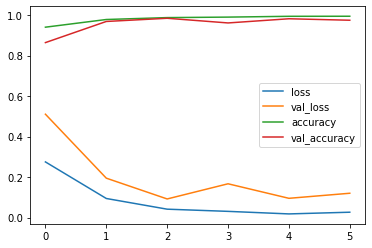

In [83]:
losses.plot()

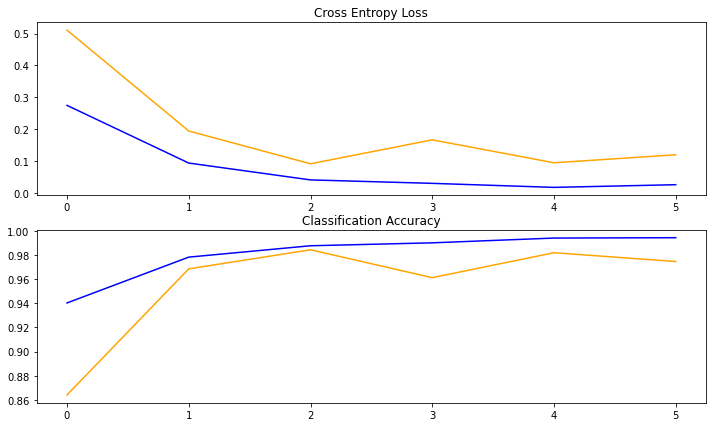

In [84]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

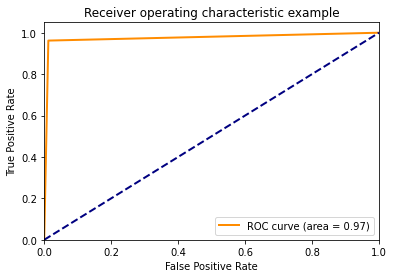

In [85]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [86]:
model.save('Mask_Detection_MobileNetV2.h5')

In [122]:
netron.start('Mask_Detection_MobileNetV2.h5')

Serving 'Mask_Detection_MobileNetV2.h5' at http://localhost:8080


('localhost', 8080)

### Implementing the model

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model = load_model('Mask_Detection_MobileNetV2.h5')

In [4]:
#Loading the cascade
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [90]:
def predict_image(filename):
    #Reading the input image
    img = cv.imread(filename)
    img = cv.resize(img,(1024,1024))
    #Converting the image into grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #Detecting the faces in the images using face_casced
    faces_rect = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x,y,w,h) in faces_rect:
        
        faces_roi = img[y:y+h,x:x+h]
        #Resizing the image of face to 32x32x3
        faces_roi = cv.resize(faces_roi,(150,150))
        #Reshaping the array to convert it into input shape of the model
        faces_roi = faces_roi.reshape(1,150,150,3)
        #Finding the probability using the model.predict
        confidence = model.predict(faces_roi)
        if confidence >= 0.5:
            label = "Masked"+ ' Probability={}'.format(confidence)
            #Putting Masked text in the images 
            cv.putText(img, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 2)
            #Drawing a GREEN coloured rectangle around the face
            cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)
        else:
            label = "Not Masked"+ ' Probability={}'.format(confidence)
            #Putting Not Masked text in the images
            cv.putText(img, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,255), 2)
            #Drawing a RED coloured rectangle around the face
            cv.rectangle(img, (x,y), (x+w,y+h), (0,0,255), thickness=2)
        
    return img

In [97]:
#Capturing an image using the webcam
videoCaptureObject = cv.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv.imwrite("New.jpg",frame)
    result = False
videoCaptureObject.release()
cv.destroyAllWindows()

In [98]:
import matplotlib.image as img

In [99]:
#Predicting and displaying the resultant image image
image = predict_image('New.jpg')
cv.imshow('img', image)
cv.waitKey()
#plt.figure(figsize=(12,12))
#plt.imshow(image)

-1

In [7]:
import cv2
import datetime
from keras.preprocessing import image

In [8]:
#Real time video predicting and displaying
cap=cv2.VideoCapture(0)
#face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        #test_image=image.load_img('temp.jpg',target_size=(32,32,3))
        test_image = cv2.imread('temp.jpg')
        test_image = cv2.resize(test_image,(160,160))
        #Reshaping the array to convert it into input shape of the model
        test_image = test_image.reshape(1,160,160,3)
        #Finding the probability using the model.predict
        confidence = model.predict(test_image)
        #test_image=image.img_to_array(test_image)
        #test_image=np.expand_dims(test_image,axis=0)
        #pred=mymodel.predict(test_image)[0][0]
        if confidence>=0.5:
            label = "Masked"+ ' Probability={}'.format(confidence)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            #cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
            cv.putText(img, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 2)
            #Drawing a GREEN coloured rectangle around the face
            cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)
        else:
            label = "Not Masked"+ ' Probability={}'.format(confidence)
            #Putting Not Masked text in the images
            cv.putText(img, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,255), 2)
            #Drawing a RED coloured rectangle around the face
            cv.rectangle(img, (x,y), (x+w,y+h), (0,0,255), thickness=2)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            #cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 43ms/step


KeyboardInterrupt: 